<a href="https://colab.research.google.com/github/FebryanRizki24/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Febryan Rizki Hidayatullah
# Kelas : TI-3F
# Nim : 2141720059
# Week 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

## 1. **Buat Gamma Correction sesuai dengan petunjuk berikut**

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


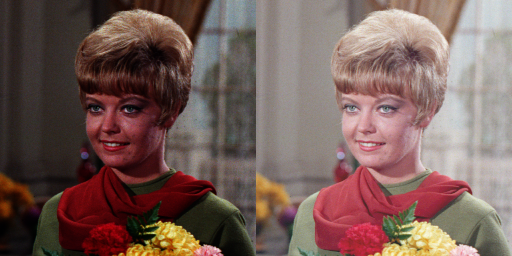

In [ ]:
print(' Gamma Correction pada citra ')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


## 2. **Buat Simulasi Image Depth**

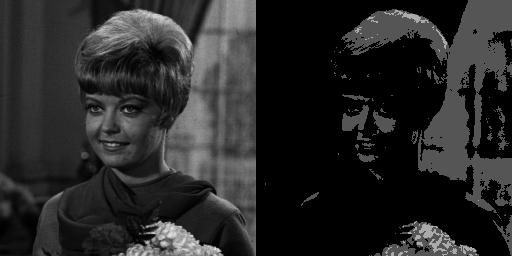

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff', cv.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = int(original[i, j] / level) * level

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

## 3. **Buat modul Average Denoising**


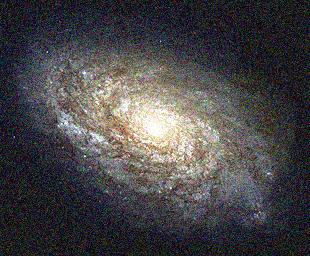

In [ ]:
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Image/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [ ]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)


PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.347136897345653


Nilai PSNR adalah 27.544885996782792 (dB)


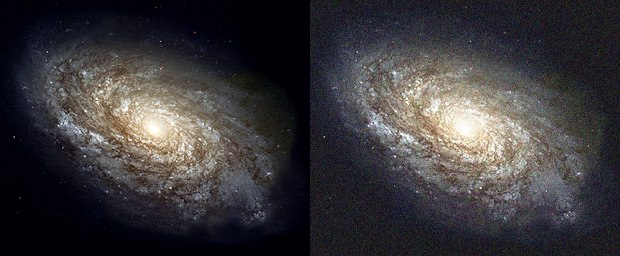

In [ ]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Image/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Image/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### hasil PSNR dengan jumlah citra average = 5

Nilai PSNR adalah 27.54176110295118 (dB)


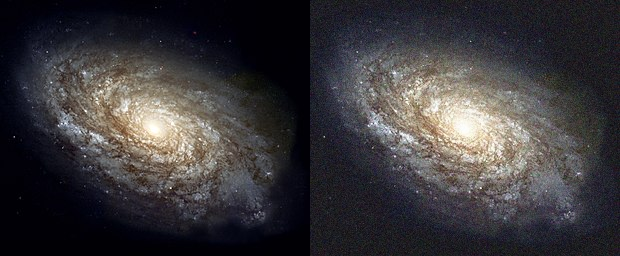

In [ ]:
dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### hasil PSNR dengan jumlah citra average = 10

Nilai PSNR adalah 27.560961660994163 (dB)


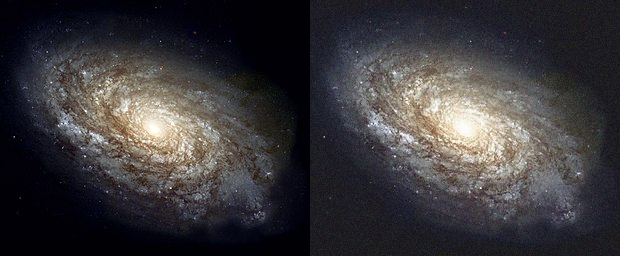

In [ ]:
dst = cv_img[0]
noise_number = 10
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### hasil PSNR dengan jumlah citra average = 20

Nilai PSNR adalah 27.540152528795524 (dB)


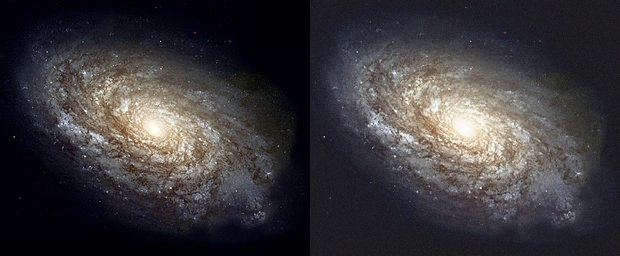

In [ ]:
dst = cv_img[0]
noise_number = 20
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### hasil PSNR dengan jumlah citra average = 40

Nilai PSNR adalah 27.496504759773963 (dB)


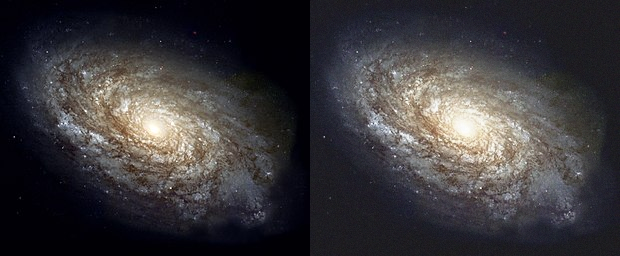

In [ ]:
dst = cv_img[0]
noise_number = 40
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### hasil PSNR dengan jumlah citra average = 80

Nilai PSNR adalah 27.50334723256408 (dB)


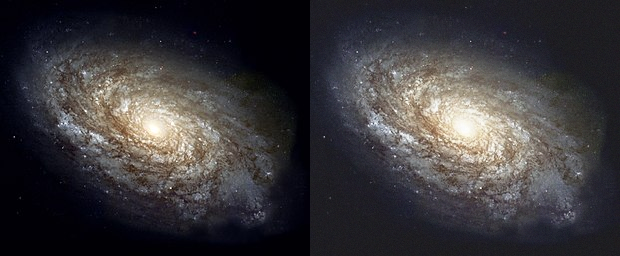

In [ ]:
dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### hasil PSNR dengan jumlah citra average = 100

Nilai PSNR adalah 27.501607157603086 (dB)


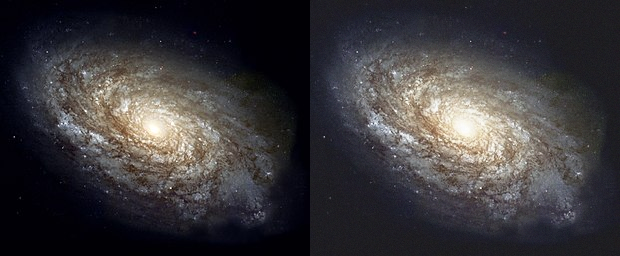

In [ ]:
dst = cv_img[0]
noise_number = 100
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah  

jawab -> bahwa hasil PSNR akan semakin besar jika noise number bertambah besar

## 4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),sedangkan image paling kanan adalah hasilnya:


## Operator And

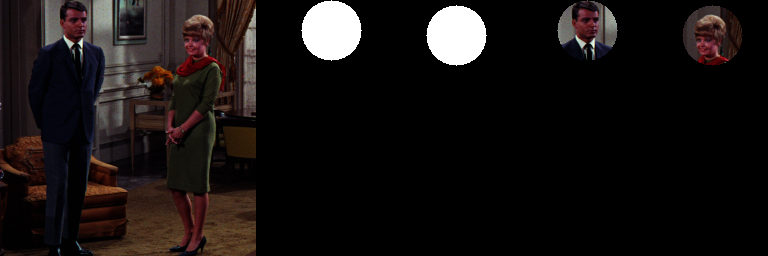

In [ ]:
# Membaca gambar asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (75, 30)  # (x, y) coordinates of the center of the first circle
radius1 = 30

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (200, 35)  # (x, y) coordinates of the center of the second circle
radius2 = 30

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = original_image & mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

##Operator OR

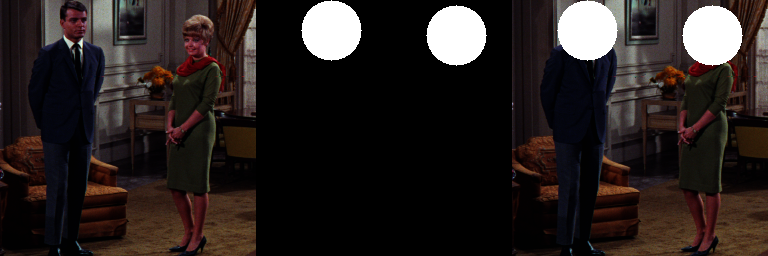

In [ ]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (75, 30)  # (x, y) coordinates of the center of the first circle
radius1 = 30

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (200, 35)  # (x, y) coordinates of the center of the second circle
radius2 = 30

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = original_image | mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

##Operator NOT

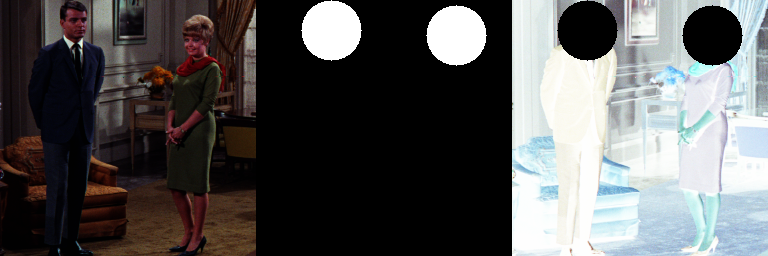

In [ ]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (75, 30)  # (x, y) coordinates of the center of the first circle
radius1 = 30

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (200, 35)  # (x, y) coordinates of the center of the second circle
radius2 = 30

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = ~original_image & ~mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

##Operator NAND

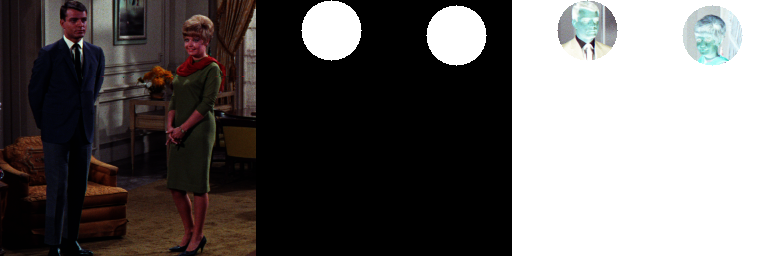

In [ ]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (75, 30)  # (x, y) coordinates of the center of the first circle
radius1 = 30

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (200, 35)  # (x, y) coordinates of the center of the second circle
radius2 = 30

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = ~(original_image & mask)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

##Oerator XOR

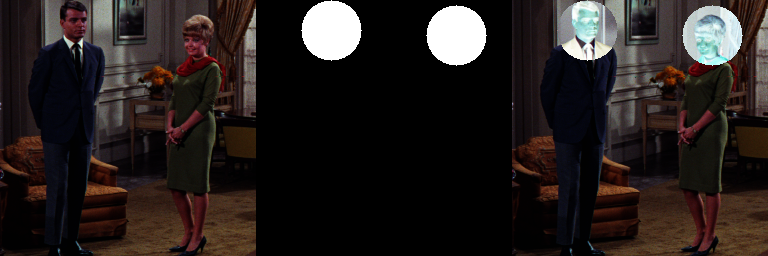

In [ ]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (75, 30)  # (x, y) coordinates of the center of the first circle
radius1 = 30

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (200, 35)  # (x, y) coordinates of the center of the second circle
radius2 = 30

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background


# Gambarlah lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = original_image ^ mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

dari percobaan diatas dapat di analisis


1.   AND -> akan menampilkan gambar mana yang sama diantara 2 gambar tersebut
2.   OR -> akan menampilkan kedua gambar tsb baik yang sama atau tidak
3.   NOT -> akan menampilkan kedua gambar tapi di inverskan
4.   NAND -> akan menampilkan gambar yang sama dari kedua gambar tapi dengan di inverskan
5.   XOR -> akan menampilkan kedua gambar tapi ketika bertemu kedua gambar tsb akan menampilkan tampilan invers nya
